In [64]:
import pandas as pd

df = pd.read_csv("./dataset/KSTAR_Disruption_ts_data_revised.csv")
df_disrupt = pd.read_csv("./dataset/KSTAR_Disruption_Shot_List_2022.csv")

In [3]:
df.head()

,Unnamed: 0,\q0,time,\q95,\ipmhd,\kappa,\tritop,\tribot,\betap,\betan,...,\POL_HA02,\POL_HA03,\POL_HA04,\POL_HA05,\POL_HA06,\POL_HA07,\POL_HA08,\POL_HA09,\POL_HA10,shot
0,0,0.0,0.15,9.503320,-97237.617188,1.021017,-0.001387,0.017653,-0.863323,-0.248114,...,1.057766e+18,1.234069e+18,4.024896e+18,4.856292e+18,5.066722e+17,8.773251e+17,8.566348e+17,2.141093e+18,3.682548e+18,13074.0
1,1,0.0,0.20,9.745522,-123203.875000,1.064507,-0.023950,0.042690,-0.465635,-0.017974,...,1.798680e+18,2.401860e+18,6.645318e+18,5.664439e+18,4.535573e+17,1.136974e+18,1.475156e+18,1.665492e+18,2.822095e+18,13074.0
2,2,0.0,0.25,9.987725,-149170.156250,1.107996,-0.046512,0.067726,-0.067947,0.212166,...,3.643609e+18,4.073703e+18,1.015022e+19,9.162292e+18,7.073283e+17,2.553749e+18,3.211600e+18,3.283637e+18,8.921761e+18,13074.0
3,3,0.0,0.30,10.229928,-175136.406250,1.151485,-0.069075,0.092763,0.329740,0.442306,...,4.737808e+18,5.306363e+18,1.393234e+19,1.290073e+19,1.279788e+18,6.087227e+18,7.394635e+18,8.056050e+18,3.006342e+19,13074.0
4,4,0.0,0.35,10.472131,-201102.687500,1.194974,-0.091638,0.117800,0.727428,0.672446,...,5.444368e+18,5.505982e+18,1.477060e+19,1.384459e+19,1.427326e+18,6.956486e+18,8.549208e+18,9.154845e+18,3.174607e+19,13074.0


In [4]:
from src.config import Config
config = Config()

t_flattop : 3.724 | t_tmq : 11.419 | t_ip_min_fault : 11.456


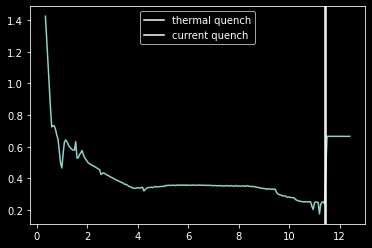

In [5]:
import matplotlib.pyplot as plt

shot = 21747
t_flattop_start = df_disrupt[df_disrupt.shot == shot].t_flattop_start.values.item()
t_tmq_ECE = df_disrupt[df_disrupt.shot == shot].t_tmq_ECE.values.item()
t_tmq = df_disrupt[df_disrupt.shot == shot].t_tmq.values.item()
t_tmq_dmf = df_disrupt[df_disrupt.shot == shot].t_tmq_dmf.values.item()
t_ip_min_fault = df_disrupt[df_disrupt.shot == shot].t_ip_min_fault.values.item()

print("t_flattop : {:.3f} | t_tmq : {:.3f} | t_ip_min_fault : {:.3f}".format(t_flattop_start, t_tmq, t_ip_min_fault))

df_shot = df[df.shot == shot]

time_x = df_shot['time']
betap = df_shot['\\betap']

plt.plot(time_x, betap)
plt.axvline(x = t_tmq, ymin = 0, ymax = 1, label = "thermal quench")
plt.axvline(x = t_ip_min_fault, ymin = 0, ymax = 1, label = "current quench")
plt.legend()

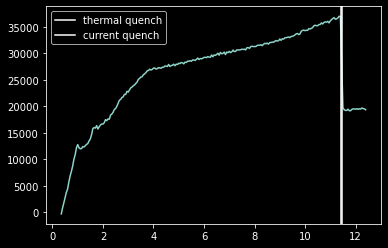

In [6]:
plt.plot(time_x, df_shot[config.HCM[6]])
plt.axvline(x = t_tmq, ymin = 0, ymax = 1, label = "thermal quench")
plt.axvline(x = t_ip_min_fault, ymin = 0, ymax = 1, label = "current quench")
plt.legend()

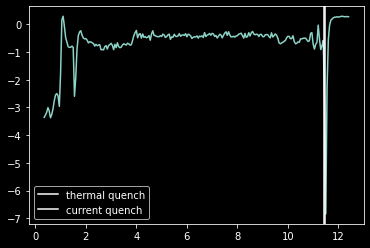

In [7]:
plt.plot(time_x, df_shot[config.LV[0]])
plt.axvline(x = t_tmq, ymin = 0, ymax = 1, label = "thermal quench")
plt.axvline(x = t_ip_min_fault, ymin = 0, ymax = 1, label = "current quench")
plt.legend()

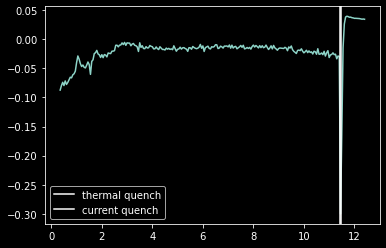

In [8]:
plt.plot(time_x, df_shot[config.RC[-1]])
plt.axvline(x = t_tmq, ymin = 0, ymax = 1, label = "thermal quench")
plt.axvline(x = t_ip_min_fault, ymin = 0, ymax = 1, label = "current quench")
plt.legend()

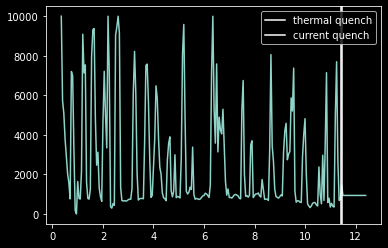

In [9]:
plt.plot(time_x, df_shot[config.TS_TE_CORE_COLS[-2]])
plt.axvline(x = t_tmq, ymin = 0, ymax = 1, label = "thermal quench")
plt.axvline(x = t_ip_min_fault, ymin = 0, ymax = 1, label = "current quench")
plt.legend()

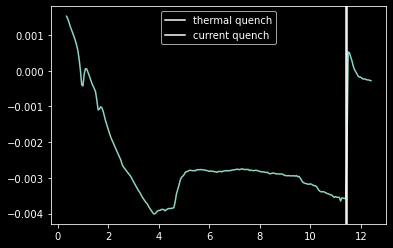

In [10]:
plt.plot(time_x, df_shot[config.DL[4]])
plt.axvline(x = t_tmq, ymin = 0, ymax = 1, label = "thermal quench")
plt.axvline(x = t_ip_min_fault, ymin = 0, ymax = 1, label = "current quench")
plt.legend()

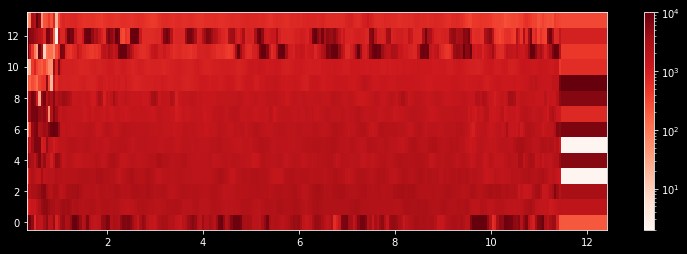

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm

x, y = np.meshgrid(time_x, [i for i in range(len(config.TS_TE_CORE_COLS))])
z = df_shot[config.TS_TE_CORE_COLS].values.transpose(1,0)

fig, ax = plt.subplots(figsize=(13, 4))
pcm = ax.pcolor(x,y,z, cmap='Reds', shading = 'auto', norm=colors.LogNorm(vmin=z.min(), vmax=z.max()))

# add the colorbar using the figure's method,
# telling which mappable we're talking about and
# which axes object it should be near
fig.colorbar(pcm, ax=ax)
plt.show()

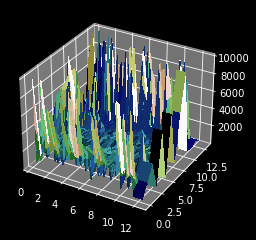

In [12]:
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

x, y = np.meshgrid(time_x, [i for i in range(len(config.TS_TE_CORE_COLS))])
z = df_shot[config.TS_TE_CORE_COLS].values.transpose(1,0)

# Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

plt.show()

In [13]:
df.isnull().sum()

Unnamed: 0        0
\q0               0
time              0
\q95              0
\ipmhd            0
              ...  
\POL_HA07     29397
\POL_HA08     29712
\POL_HA09     29712
\POL_HA10     29397
shot              0
Length: 185, dtype: int64

In [14]:
null_cols = df.columns[df.isnull().sum() > 0]

In [15]:
normal_cols = df.columns[df.isnull().sum() == 0]
print("normal_cols : ", normal_cols)

normal_cols :  Index(['Unnamed: 0', '\q0', 'time', '\q95', '\ipmhd', '\kappa', '\tritop',
       '\tribot', '\betap', '\betan', '\li', '\bcentr', '\rsurf', '\aminor',
       'shot'],
      dtype='object')


In [16]:
print("total columns : {}, null columns : {}".format(len(df.columns), len(null_cols)))

total columns : 185, null columns : 170


<AxesSubplot:>

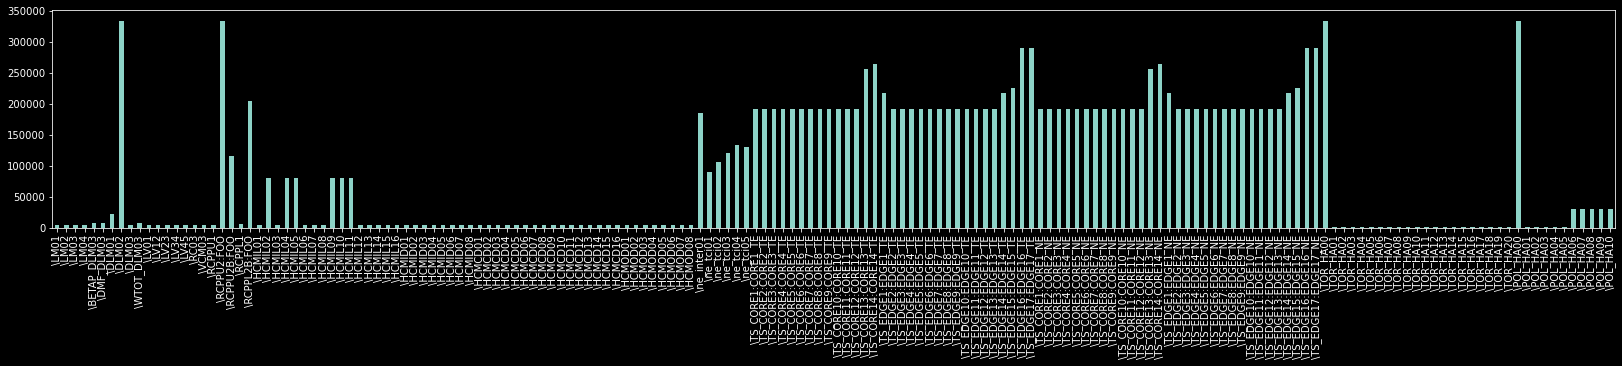

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (28,4))
df.isnull().sum()[df.isnull().sum() > 0].plot(kind = 'bar')

In [18]:
df.isnull().sum()['\\q0']

0

In [26]:
import numpy as np
from tqdm.auto import tqdm

shot_list = np.unique(df.shot)
null_shot_list = []
null_col_list = []

for shot in tqdm(shot_list):
    df_shot = df[df.shot == shot]
    total_len = len(df_shot)
    
    for col in null_cols:
        if df_shot[null_cols].isnull().sum()[col] > 0.5 * total_len:
            null_shot_list.append(shot)
            null_col_list.append(col)
            
summary = {
    "shot" : null_shot_list,
    "col" : null_col_list
}

summary = pd.DataFrame(summary)

  0%|          | 0/2146 [00:00<?, ?it/s]

In [27]:
len(shot_list)

2146

In [28]:
summary.col.value_counts()

\DLM02                  2146
\POL_HA00               2146
\TOR_HA00               2146
\RCPPU2:FOO             2146
\TS_EDGE17:EDGE17_TE    1871
                        ... 
\TOR_HA20                  9
\POL_HA01                  9
\POL_HA02                  9
\POL_HA03                  9
\TOR_HA04                  9
Name: col, Length: 170, dtype: int64

In [29]:
summary.col.value_counts()[config.TS_TE_CORE_COLS ]

\TS_CORE1:CORE1_TE      1264
\TS_CORE2:CORE2_TE      1264
\TS_CORE3:CORE3_TE      1264
\TS_CORE4:CORE4_TE      1264
\TS_CORE5:CORE5_TE      1264
\TS_CORE6:CORE6_TE      1264
\TS_CORE7:CORE7_TE      1264
\TS_CORE8:CORE8_TE      1264
\TS_CORE9:CORE9_TE      1264
\TS_CORE10:CORE10_TE    1264
\TS_CORE11:CORE11_TE    1264
\TS_CORE12:CORE12_TE    1264
\TS_CORE13:CORE13_TE    1693
\TS_CORE14:CORE14_TE    1730
Name: col, dtype: int64

In [30]:
summary.col.value_counts()[config.TS_NE_CORE_COLS]

\TS_CORE1:CORE1_NE      1264
\TS_CORE2:CORE2_NE      1264
\TS_CORE3:CORE3_NE      1264
\TS_CORE4:CORE4_NE      1264
\TS_CORE5:CORE5_NE      1264
\TS_CORE6:CORE6_NE      1264
\TS_CORE7:CORE7_NE      1264
\TS_CORE8:CORE8_NE      1264
\TS_CORE9:CORE9_NE      1264
\TS_CORE10:CORE10_NE    1264
\TS_CORE11:CORE11_NE    1264
\TS_CORE12:CORE12_NE    1264
\TS_CORE13:CORE13_NE    1693
\TS_CORE14:CORE14_NE    1730
Name: col, dtype: int64

In [31]:
summary.col.value_counts()[config.TS_TE_EDGE_COLS ]

\TS_EDGE1:EDGE1_TE      1405
\TS_EDGE2:EDGE2_TE      1264
\TS_EDGE3:EDGE3_TE      1264
\TS_EDGE4:EDGE4_TE      1264
\TS_EDGE5:EDGE5_TE      1264
\TS_EDGE6:EDGE6_TE      1264
\TS_EDGE7:EDGE7_TE      1264
\TS_EDGE8:EDGE8_TE      1264
\TS_EDGE9:EDGE9_TE      1264
\TS_EDGE10:EDGE10_TE    1264
\TS_EDGE11:EDGE11_TE    1264
\TS_EDGE12:EDGE12_TE    1264
\TS_EDGE13:EDGE13_TE    1264
\TS_EDGE14:EDGE14_TE    1405
\TS_EDGE15:EDGE15_TE    1442
Name: col, dtype: int64

In [32]:
summary.col.value_counts()[config.TS_NE_EDGE_COLS ]

\TS_EDGE1:EDGE1_NE      1405
\TS_EDGE2:EDGE2_NE      1264
\TS_EDGE3:EDGE3_NE      1264
\TS_EDGE4:EDGE4_NE      1264
\TS_EDGE5:EDGE5_NE      1264
\TS_EDGE6:EDGE6_NE      1264
\TS_EDGE7:EDGE7_NE      1264
\TS_EDGE8:EDGE8_NE      1264
\TS_EDGE9:EDGE9_NE      1264
\TS_EDGE10:EDGE10_NE    1264
\TS_EDGE11:EDGE11_NE    1264
\TS_EDGE12:EDGE12_NE    1264
\TS_EDGE13:EDGE13_NE    1264
\TS_EDGE14:EDGE14_NE    1405
\TS_EDGE15:EDGE15_NE    1442
Name: col, dtype: int64

In [33]:
summary.col.value_counts()[config.LM ]

\LM01    28
\LM02    28
\LM03    28
\LM04    28
Name: col, dtype: int64

In [34]:
summary.col.value_counts()[config.DL]

\BETAP_DLM03      43
\DMF_DLM03        43
\DLM01           151
\DLM02          2146
\DLM03            31
\WTOT_DLM03       43
Name: col, dtype: int64

In [35]:
summary.col.value_counts()[config.RC]

\RC03             28
\VCM03            28
\RCPPU1           27
\RCPPU2:FOO     2146
\RCPPU2B:FOO     764
\RCPPL1           30
\RCPPL2B:FOO    1301
Name: col, dtype: int64

In [36]:
summary.col.value_counts()[config.HCM]

\HCMIL01     31
\HCMIL02    549
\HCMIL03     31
\HCMIL04    549
\HCMIL05    549
\HCMIL06     31
\HCMIL07     31
\HCMIL08     31
\HCMIL09    549
\HCMIL10    549
\HCMIL11    549
\HCMIL12     31
\HCMIL13     31
\HCMIL14     31
\HCMIL15     31
\HCMIL16     31
\HCMID01     31
\HCMID02     31
\HCMID03     31
\HCMID04     31
\HCMID05     31
\HCMID06     31
\HCMID07     31
\HCMID08     31
\HCMCD01     31
\HCMCD02     31
\HCMCD03     31
\HCMCD04     31
\HCMCD05     31
\HCMCD06     31
\HCMCD07     31
\HCMCD08     31
\HCMCD09     31
\HCMCD10     31
\HCMCD11     31
\HCMCD12     31
\HCMCD13     31
\HCMCD14     31
\HCMCD15     31
\HCMCD16     31
\HCMOD01     31
\HCMOD02     31
\HCMOD03     31
\HCMOD04     31
\HCMOD05     31
\HCMOD06     31
\HCMOD07     31
\HCMOD08     31
Name: col, dtype: int64

In [37]:
summary.col.value_counts()[config.TCI]

\ne_inter01    1182
\ne_tci01       613
\ne_tci02       711
\ne_tci03       803
\ne_tci04       890
\ne_tci05       864
Name: col, dtype: int64

In [38]:
summary.col.value_counts()[config.HA]

\TOR_HA00    2146
\TOR_HA01       9
\TOR_HA02       9
\TOR_HA03       9
\TOR_HA04       9
\TOR_HA05       9
\TOR_HA06       9
\TOR_HA07       9
\TOR_HA08       9
\TOR_HA09       9
\TOR_HA10       9
\TOR_HA11       9
\TOR_HA12       9
\TOR_HA13       9
\TOR_HA14       9
\TOR_HA15       9
\TOR_HA16       9
\TOR_HA17       9
\TOR_HA18       9
\TOR_HA19       9
\TOR_HA20       9
\POL_HA00    2146
\POL_HA01       9
\POL_HA02       9
\POL_HA03       9
\POL_HA04       9
\POL_HA05       9
\POL_HA06     188
\POL_HA07     188
\POL_HA08     190
\POL_HA09     190
\POL_HA10     188
Name: col, dtype: int64

In [39]:
ignore_col_list = []
for col in np.unique(summary.col):
    if summary.col.value_counts()[col] > 30:
        ignore_col_list.append(col)

In [40]:
len(ignore_col_list)

132

In [41]:
summary.shot.value_counts()

16598.0    143
16600.0    143
17325.0    139
28323.0    135
28309.0    135
          ... 
22973.0      4
22959.0      4
22965.0      4
22970.0      4
22971.0      4
Name: shot, Length: 2146, dtype: int64

In [42]:
ignore_shot_list = []
for shot in np.unique(summary.shot):
    if summary.shot.value_counts()[shot] > 30:
        ignore_shot_list.append(shot)

In [43]:
len(ignore_shot_list)

1297

In [44]:
summary[summary.shot == 22971]

,shot,col
40953,22971.0,\DLM02
40954,22971.0,\RCPPU2:FOO
40955,22971.0,\TOR_HA00
40956,22971.0,\POL_HA00


In [45]:
summary[summary.shot == 22970]

,shot,col
40949,22970.0,\DLM02
40950,22970.0,\RCPPU2:FOO
40951,22970.0,\TOR_HA00
40952,22970.0,\POL_HA00


In [20]:
import numpy as np
from tqdm.auto import tqdm

shot_list = np.unique(df.shot)
shot_ignore = []
total_cols = config.DEFAULT_COLS + config.LM + config.HCM + config.DL + config.LV + config.RC + config.TCI + config.HA + config.TS
total_cols = [col for col in total_cols if col not in config.EXCEPT_COLS]
    
for shot in tqdm(shot_list, desc = 'remove the invalid values'):
    # dataframe per shot
    df_shot = df[df.shot==shot]
    
    # time length of the experiment is too short : at least larger than 2(s)
    if df_shot.time.iloc[-1] - df_shot.time.iloc[0] < 2.0:
        shot_ignore.append(shot)
        print("shot : {} - time length issue".format(shot))
        continue
    
    # 1st filter : null data ignore
    is_null = False
    for col in total_cols:
        if df_shot[total_cols].isnull().sum()[col] > 0.5 * len(df_shot):
            shot_ignore.append(shot)
            print("shot : {} - null data ignore".format(shot))
            is_null = True
            break
    
    if is_null:
        continue
    
    # 2nd filter : measurement error
    for col in config.DEFAULT_COLS:
        # null data
        if np.sum(df_shot[col] == 0) > 0.5 * len(df_shot):
            shot_ignore.append(shot)
            print("shot : {} - measurement issue".format(shot))
            break
        
        # constant value
        if df_shot[col].max() - df_shot[col].min() < 1e-3:
            shot_ignore.append(shot)
            print("shot : {} - invalid / constant value issue".format(shot))
            break

remove the invalid values:   0%|          | 0/2146 [00:00<?, ?it/s]

shot : 13074.0 - null data ignore
shot : 13182.0 - time length issue
shot : 13183.0 - time length issue
shot : 13185.0 - time length issue
shot : 13186.0 - time length issue
shot : 13187.0 - time length issue
shot : 13188.0 - time length issue
shot : 13189.0 - time length issue
shot : 13190.0 - time length issue
shot : 13191.0 - time length issue
shot : 13192.0 - time length issue
shot : 13193.0 - time length issue
shot : 13194.0 - time length issue
shot : 13196.0 - time length issue
shot : 13198.0 - time length issue
shot : 13236.0 - null data ignore
shot : 13413.0 - null data ignore
shot : 13415.0 - null data ignore
shot : 13428.0 - null data ignore
shot : 13429.0 - null data ignore
shot : 13430.0 - null data ignore
shot : 13431.0 - null data ignore
shot : 13442.0 - null data ignore
shot : 13453.0 - null data ignore
shot : 13478.0 - null data ignore
shot : 13479.0 - null data ignore
shot : 13483.0 - null data ignore
shot : 13491.0 - null data ignore
shot : 13492.0 - null data ignore


In [81]:
df_shot = df[df.shot == 32565]
df_shot[total_cols].isnull().sum()

\q0                       0
\q95                      0
\ipmhd                    0
\kappa                    0
\tritop                   0
                       ... 
\TS_EDGE8:EDGE8_NE      204
\TS_EDGE9:EDGE9_NE      204
\TS_EDGE10:EDGE10_NE    204
\TS_EDGE11:EDGE11_NE    204
\TS_EDGE12:EDGE12_NE    204
Length: 155, dtype: int64

In [82]:
for col in total_cols:
    if df_shot[total_cols].isnull().sum()[col] > 0.5 * len(df_shot):
        print(col) 

\ne_inter01
\TS_CORE1:CORE1_TE
\TS_CORE2:CORE2_TE
\TS_CORE3:CORE3_TE
\TS_CORE4:CORE4_TE
\TS_CORE5:CORE5_TE
\TS_CORE6:CORE6_TE
\TS_CORE7:CORE7_TE
\TS_CORE8:CORE8_TE
\TS_CORE9:CORE9_TE
\TS_CORE10:CORE10_TE
\TS_CORE11:CORE11_TE
\TS_CORE12:CORE12_TE
\TS_EDGE1:EDGE1_TE
\TS_EDGE2:EDGE2_TE
\TS_EDGE3:EDGE3_TE
\TS_EDGE4:EDGE4_TE
\TS_EDGE5:EDGE5_TE
\TS_EDGE6:EDGE6_TE
\TS_EDGE7:EDGE7_TE
\TS_EDGE8:EDGE8_TE
\TS_EDGE9:EDGE9_TE
\TS_EDGE10:EDGE10_TE
\TS_EDGE11:EDGE11_TE
\TS_EDGE12:EDGE12_TE
\TS_CORE1:CORE1_NE
\TS_CORE2:CORE2_NE
\TS_CORE3:CORE3_NE
\TS_CORE4:CORE4_NE
\TS_CORE5:CORE5_NE
\TS_CORE6:CORE6_NE
\TS_CORE7:CORE7_NE
\TS_CORE8:CORE8_NE
\TS_CORE9:CORE9_NE
\TS_CORE10:CORE10_NE
\TS_CORE11:CORE11_NE
\TS_CORE12:CORE12_NE
\TS_EDGE1:EDGE1_NE
\TS_EDGE2:EDGE2_NE
\TS_EDGE3:EDGE3_NE
\TS_EDGE4:EDGE4_NE
\TS_EDGE5:EDGE5_NE
\TS_EDGE6:EDGE6_NE
\TS_EDGE7:EDGE7_NE
\TS_EDGE8:EDGE8_NE
\TS_EDGE9:EDGE9_NE
\TS_EDGE10:EDGE10_NE
\TS_EDGE11:EDGE11_NE
\TS_EDGE12:EDGE12_NE


In [85]:
for col in config.DEFAULT_COLS:
    if np.sum(df_shot[col] == 0) > 0.5 * len(df_shot):
        print("measurement error : ", col) 

    if df_shot[col].max() - df_shot[col].min() < 1e-3:
        print("invalid / constant value issue : ", col)
            

invalid / constant value issue :  \bcentr


In [93]:
df[config.RC]

,\RC03,\VCM03,\RCPPU1,\RCPPU2:FOO,\RCPPU2B:FOO,\RCPPL1,\RCPPL2B:FOO
0,-94607.046875,-226393.406250,3.175294e+06,NaN,NaN,-3858536.5,NaN
1,-140019.531250,-229203.125000,1.284858e+06,NaN,NaN,-2804110.5,NaN
2,-167812.828125,-209990.750000,2.989731e+05,NaN,NaN,-2368545.5,NaN
3,-186978.968750,-231399.656250,1.217371e+06,NaN,NaN,-3361274.5,NaN
4,-210224.781250,-261078.156250,1.183542e+06,NaN,NaN,-2830444.5,NaN
...,...,...,...,...,...,...,...
334349,-13568.181641,-3754.290527,-3.930884e+07,NaN,0.034672,-119262896.0,NaN
334350,-13509.849609,-3597.001465,-3.931431e+07,NaN,0.034668,-119793328.0,NaN
334351,-13387.712891,-3492.659668,-3.960191e+07,NaN,0.034795,-120082200.0,NaN
334352,-13568.650391,-4243.316895,-3.993711e+07,NaN,0.035034,-120517424.0,NaN


In [14]:
import torch
import os
import numpy as np
import pandas as pd
import argparse
from src.dataset import DatasetFor0D
from torch.utils.data import DataLoader, RandomSampler
from src.utils.sampler import ImbalancedDatasetSampler
from src.utils.utility import preparing_0D_dataset, plot_learning_curve, generate_prob_curve_from_0D, seed_everything
from src.visualization.visualize_latent_space import visualize_2D_latent_space, visualize_3D_latent_space
from src.visualization.visualize_application import generate_real_time_experiment_0D
from src.train import train
from src.evaluate import evaluate
from src.loss import FocalLoss, LDAMLoss, CELoss
from src.models.transformer import Transformer
from src.feature_importance import compute_permute_feature_importance
from src.config import Config

config = Config()
ts_cols = config.input_features

args = {
    "seq_len" : 20,
    "dist" : 2,
    "num_workers" : 1,
    "pin_memory" : False,
    "batch_size" : 1,
}

# dataset setup
ts_train, ts_valid, ts_test, ts_scaler = preparing_0D_dataset("./dataset/KSTAR_Disruption_ts_data_extend.csv", ts_cols = ts_cols, scaler = 'Robust')
kstar_shot_list = pd.read_csv('./dataset/KSTAR_Disruption_Shot_List_2022.csv', encoding = "euc-kr")

train_data = DatasetFor0D(ts_train, kstar_shot_list, seq_len = args['seq_len'], cols = ts_cols, dist = args['dist'], dt = 0.025, scaler = ts_scaler)
valid_data = DatasetFor0D(ts_valid, kstar_shot_list, seq_len = args['seq_len'], cols = ts_cols, dist = args['dist'], dt = 0.025, scaler = ts_scaler)
test_data = DatasetFor0D(ts_test, kstar_shot_list, seq_len = args['seq_len'], cols = ts_cols, dist = args['dist'], dt = 0.025, scaler = ts_scaler)
    
    
# label distribution for LDAM / Focal Loss
train_data.get_num_per_cls()
cls_num_list = train_data.get_cls_num_list()


train_sampler = ImbalancedDatasetSampler(train_data)
valid_sampler = RandomSampler(valid_data)
test_sampler = RandomSampler(test_data)

train_loader = DataLoader(train_data, batch_size = args['batch_size'], sampler=train_sampler, num_workers = args["num_workers"], pin_memory=args["pin_memory"])
valid_loader = DataLoader(valid_data, batch_size = args['batch_size'], sampler=valid_sampler, num_workers = args["num_workers"], pin_memory=args["pin_memory"])
test_loader = DataLoader(test_data, batch_size = args['batch_size'], sampler=test_sampler, num_workers = args["num_workers"], pin_memory=args["pin_memory"])

generate index: 100%|██████████| 174/174 [00:01<00:00, 116.95it/s]


In [12]:
df = pd.read_csv("./dataset/KSTAR_Disruption_ts_data_revised.csv")

In [13]:
df[config.TS_NE_CORE_COLS].describe()

,\TS_CORE1:CORE1_NE,\TS_CORE2:CORE2_NE,\TS_CORE3:CORE3_NE,\TS_CORE4:CORE4_NE,\TS_CORE5:CORE5_NE,\TS_CORE6:CORE6_NE,\TS_CORE7:CORE7_NE,\TS_CORE8:CORE8_NE,\TS_CORE9:CORE9_NE,\TS_CORE10:CORE10_NE,\TS_CORE11:CORE11_NE,\TS_CORE12:CORE12_NE,\TS_CORE13:CORE13_NE,\TS_CORE14:CORE14_NE
count,1.433260e+05,1.433260e+05,1.433260e+05,1.433260e+05,1.433260e+05,1.433260e+05,1.433260e+05,1.433260e+05,1.433260e+05,1.433260e+05,1.433260e+05,1.433260e+05,7.835200e+04,7.006600e+04
mean,2.240387e+30,1.301675e+32,2.230832e+32,7.142923e+32,1.190325e+32,3.112103e+32,1.112187e+32,1.934541e+32,4.190463e+32,2.389480e+32,2.350143e+31,6.583252e+32,2.598573e+19,2.329132e+19
std,2.900838e+32,5.970101e+33,8.081396e+33,4.546224e+34,5.000373e+33,9.399593e+33,5.773095e+33,4.283821e+33,2.470602e+34,5.551771e+33,1.360908e+33,1.127479e+34,5.906198e+19,3.653287e+19
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.463137e+19,1.525026e+19,1.434949e+19,1.261701e+19,1.386731e+19,1.244765e+19,1.133713e+19,8.722435e+18,1.089272e+19,4.052402e+18,8.524389e+18,7.725994e+18,8.678907e+18
50%,1.317955e+19,2.682331e+19,2.756454e+19,2.773359e+19,2.420102e+19,2.842611e+19,2.420757e+19,2.302586e+19,1.786644e+19,2.171242e+19,1.784348e+19,1.677819e+19,1.785146e+19,1.852990e+19
75%,3.050157e+19,4.165998e+19,4.256233e+19,4.398774e+19,3.596262e+19,4.043824e+19,3.591853e+19,3.372276e+19,2.667168e+19,3.168057e+19,2.984283e+19,2.648330e+19,3.048673e+19,3.095408e+19
max,7.577774e+34,1.020904e+36,1.420457e+36,4.008380e+36,7.375763e+35,1.023073e+36,1.111768e+36,5.749051e+35,2.176074e+36,4.050749e+35,1.194529e+35,4.831358e+35,3.376299e+21,2.906202e+21


In [11]:
train_data.ts_data[train_data.cols].describe()

,\q95,\ipmhd,\kappa,\tritop,\tribot,\betap,\li,\WTOT_DLM03,\ne_inter01,\TS_NE_CORE_AVG,\TS_TE_CORE_AVG
count,4.533240e+05,453324.000000,453324.000000,453324.000000,453324.000000,4.533240e+05,4.533240e+05,453324.000000,453324.000000,4.533240e+05,4.533240e+05
mean,5.318393e-01,0.259070,-0.272702,0.523992,-0.154691,9.150355e-02,7.114488e-01,0.108948,-0.278962,-4.583179e+11,2.907196e-01
std,1.161508e+01,29.464132,4.602324,8.082433,3.035680,2.588204e+00,1.798261e+01,1.515961,1.359374,3.002145e+14,2.749160e+01
min,-3.845219e+00,-5.329080,-11.000008,-1.936872,-1.584952,-1.270564e+00,-2.883386e+00,-0.956609,-1.724852,-6.996924e+16,-2.195433e+03
25%,-5.622538e-01,-0.394127,-0.683474,-0.432717,-0.781342,-5.279790e-01,-3.299555e-01,-0.497301,-1.000000,-2.927690e-01,-4.354912e-01
50%,1.880480e-07,0.000000,0.000000,0.000000,0.000000,6.691653e-08,1.605179e-07,0.000000,0.000000,-3.327068e-08,-4.971776e-08
75%,4.377462e-01,0.605873,0.316526,0.567283,0.218658,4.720210e-01,6.700445e-01,0.502699,0.000000,7.072310e-01,5.645088e-01
max,3.003127e+03,11065.103516,567.185669,1064.988892,462.352264,3.233467e+02,2.694753e+03,175.864426,93.325974,3.098367e+15,2.706116e+03


In [7]:
train_data.ts_data['\\ipmhd'].max()

11065.103515625

In [9]:
test_data.ts_data['\\ipmhd'].min()

-5.328076362609863

In [10]:
test_data.ts_data['\\TS_NE_CORE_AVG'].max()

3948731191787520.0

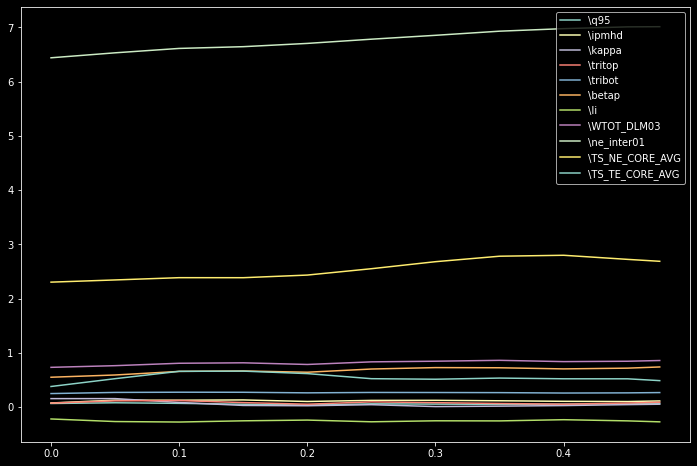

In [15]:
sample_data, sample_target = next(iter(test_loader))

import matplotlib.pyplot as plt
sample_data = sample_data.numpy()
time_x = [i * 0.025 for i in range(args['seq_len'])]

plt.figure(1, figsize = (12,8))

for idx, col in enumerate(ts_cols):
    plt.plot(time_x, sample_data[:,:,idx].reshape(-1,), label = col)

plt.legend()
plt.show()

In [27]:
idx = 10
print(sample_data[:,:,idx])
print(ts_cols[idx])

[[0.38015378 0.4521646  0.52417725 0.5920013  0.6598252  0.6616487
  0.66347    0.6406751  0.6178791  0.57096463 0.5240488  0.5190845
  0.51412165 0.52474445 0.53536785 0.5287624  0.5221566  0.52195394
  0.5217513  0.48811266]]
\TS_TE_CORE_AVG
